<a href="https://colab.research.google.com/github/shahrinsabrina/PythonNumericalProjects/blob/main/Analysis_of_How_an_Object_Orients_in_3D_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of How an Object Orients in 3D Space

**Student Name:** Sabrina Shahrin Rashid  
**Reg. no:** 2016132069  
**Assignment – 2, Computational Physics**  

## Objective
The objective of this project is to simulate and analyze the orientation of a rigid object in three-dimensional space. Using Python, we explore different representations of rotation, including rotation matrices, Euler angles, and quaternions. The project visualizes the orientation over time and demonstrates the relationships between these representations.


## Theory and Background
In 3D space, the orientation of a rigid body is described by rotations about axes. The main representations are:

- **Rotation Matrices \( R \)**: 3×3 orthogonal matrices representing rotations.
- **Euler Angles \( (\phi, \theta, \psi) \)**: Three angles representing sequential rotations about Z, Y, and X axes.
- **Quaternions \( q = w + x i + y j + z k \)**: Four-component numbers encoding rotations without gimbal lock, normalized such that \( w^2 + x^2 + y^2 + z^2 = 1 \).

Rotation matrices satisfy:

\[
R^T R = I, \quad \det(R) = 1
\]

Euler angles are denoted as \((\phi, \theta, \psi)\), representing rotations about Z, Y, and X axes respectively. Quaternions satisfy:

\[
w^2 + x^2 + y^2 + z^2 = 1
\]

These representations are essential in physics simulations, robotics, and computer graphics.


## Problem Statement
We aim to simulate the orientation of a rigid body over time using a constant angular velocity vector \( \vec{\omega} \). The objectives are:

- Represent rotations using rotation matrices \( R \)
- Convert between Euler angles \( (\phi, \theta, \psi) \), rotation matrices, and quaternions \( q \)
- Visualize the 3D object’s orientation over time
- Analyze the trajectory of Euler angles and quaternion components


## Methodology
1. Define a 3D object (cube) with vertices in local coordinates.
2. Construct a rotation matrix \( R \) using angular velocity \( \vec{\omega} \) and time step \( \Delta t \).
3. Update the object’s orientation iteratively:

\[
\vec{v}_{\text{rotated}} = R \cdot \vec{v}_{\text{initial}}
\]

4. At each step, compute Euler angles \( (\phi, \theta, \psi) \) and quaternion \( q \) from the rotation matrix.
5. Store orientations for multiple time steps.
6. Visualize the cube in 3D and plot Euler angles and quaternion components.


## Computational Parameters
- Time step: \( \Delta t = 0.05 \, \mathrm{s} \)  
- Total steps: 200  
- Angular velocity: \( \vec{\omega} = (0.5, 0.3, 0.2) \, \mathrm{rad/s} \)  
- Object: Cube with side length 1


In [7]:
# Python Cell 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

plt.style.use("seaborn-v0_8-darkgrid")


In [8]:
# Python Cell 2: Define cube vertices
cube_vertices = np.array([
    [-0.5, -0.5, -0.5],
    [ 0.5, -0.5, -0.5],
    [ 0.5,  0.5, -0.5],
    [-0.5,  0.5, -0.5],
    [-0.5, -0.5,  0.5],
    [ 0.5, -0.5,  0.5],
    [ 0.5,  0.5,  0.5],
    [-0.5,  0.5,  0.5]
])


In [9]:
# Python Cell 3: Function to rotate cube
def rotate_cube(vertices, rotation_matrix):
    return vertices @ rotation_matrix.T


In [10]:
# Python Cell 4: Simulation parameters
delta_t = 0.05  # Time step (s)
steps = 200     # Total steps
omega = np.array([0.5, 0.3, 0.2])  # Angular velocity vector (rad/s)

R_total = np.eye(3)
rotations = []
euler_angles_list = []
quaternions_list = []


In [11]:
# Python Cell 5: Run simulation
for _ in range(steps):
    theta = np.linalg.norm(omega) * delta_t
    axis = omega / np.linalg.norm(omega)

    r = R.from_rotvec(axis * theta)
    R_step = r.as_matrix()

    R_total = R_step @ R_total
    rotations.append(R_total.copy())

    euler_angles_list.append(R.from_matrix(R_total).as_euler('xyz', degrees=True))
    quaternions_list.append(R.from_matrix(R_total).as_quat())


In [12]:
# Python Cell 6: Convert results to arrays
euler_angles = np.array(euler_angles_list)
quaternions = np.array(quaternions_list)


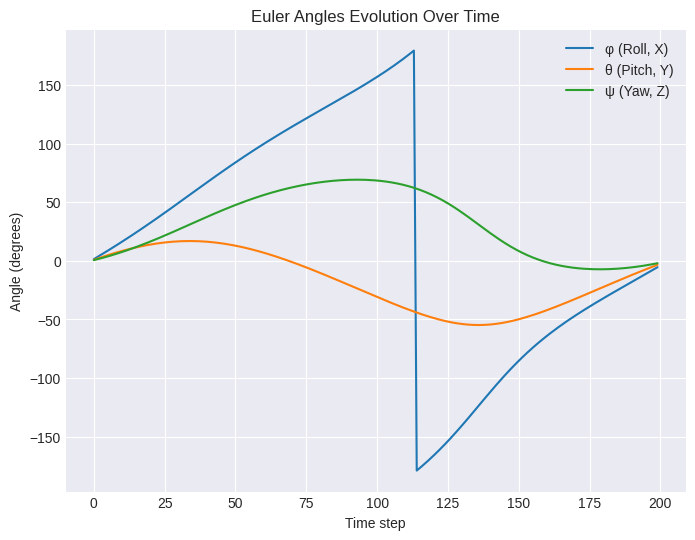

In [13]:
# Python Cell 7: Plot Euler angles
plt.figure(figsize=(8,6))
plt.plot(euler_angles[:,0], label='φ (Roll, X)')
plt.plot(euler_angles[:,1], label='θ (Pitch, Y)')
plt.plot(euler_angles[:,2], label='ψ (Yaw, Z)')
plt.xlabel("Time step")
plt.ylabel("Angle (degrees)")
plt.title("Euler Angles Evolution Over Time")
plt.legend()
plt.show()


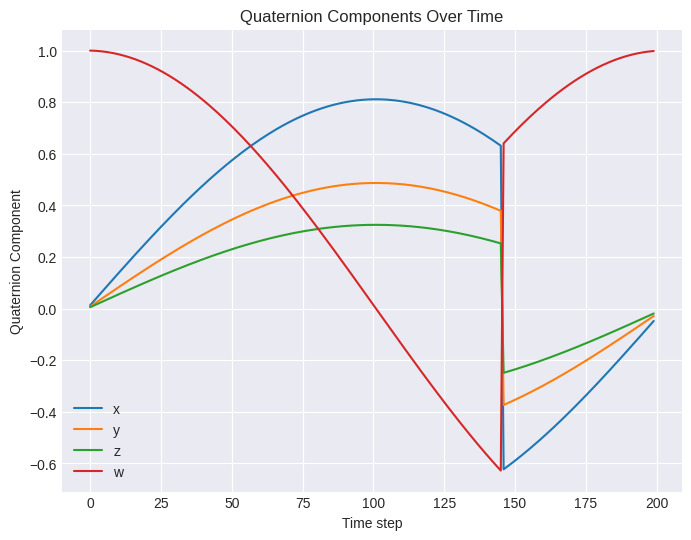

In [14]:
# Python Cell 8: Plot quaternion components
plt.figure(figsize=(8,6))
plt.plot(quaternions[:,0], label='x')
plt.plot(quaternions[:,1], label='y')
plt.plot(quaternions[:,2], label='z')
plt.plot(quaternions[:,3], label='w')
plt.xlabel("Time step")
plt.ylabel("Quaternion Component")
plt.title("Quaternion Components Over Time")
plt.legend()
plt.show()


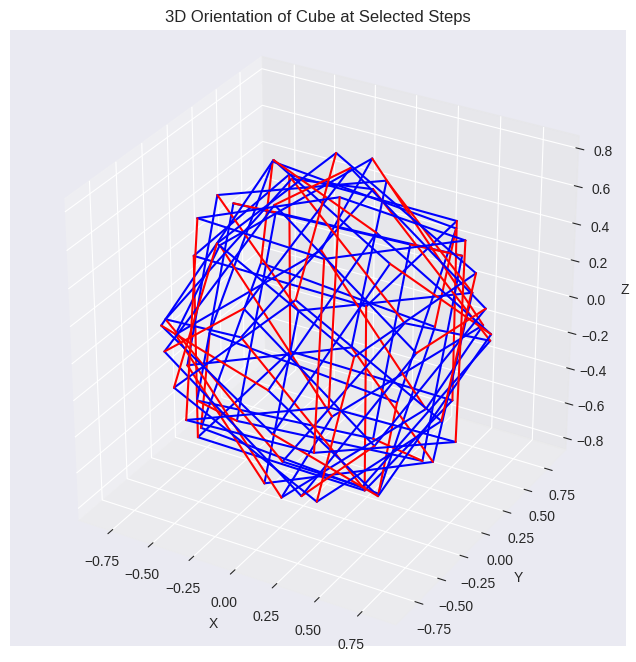

In [15]:
# Python Cell 9: 3D visualization of cube
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])

for i in range(0, steps, 20):
    cube_rotated = rotate_cube(cube_vertices, rotations[i])

    # Bottom square
    for j in range(4):
        ax.plot([cube_rotated[j,0], cube_rotated[(j+1)%4,0]],
                [cube_rotated[j,1], cube_rotated[(j+1)%4,1]],
                [cube_rotated[j,2], cube_rotated[(j+1)%4,2]], color='blue')
    # Top square
    for j in range(4,8):
        ax.plot([cube_rotated[j,0], cube_rotated[(j+1)%4+4,0]],
                [cube_rotated[j,1], cube_rotated[(j+1)%4+4,1]],
                [cube_rotated[j,2], cube_rotated[(j+1)%4+4,2]], color='blue')
    # Vertical edges
    for j in range(4):
        ax.plot([cube_rotated[j,0], cube_rotated[j+4,0]],
                [cube_rotated[j,1], cube_rotated[j+4,1]],
                [cube_rotated[j,2], cube_rotated[j+4,2]], color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("3D Orientation of Cube at Selected Steps")
plt.show()


## Results and Discussion
The simulation shows the 3D rotation of a cube under a constant angular velocity \( \vec{\omega} \):

- Euler angles \( (\phi, \theta, \psi) \) demonstrate sequential rotations about X, Y, and Z axes.  
- Quaternion components provide a smooth representation without singularities.  
- The 3D visualization confirms the combined rotation in all three axes.

This highlights the relationship between rotation matrices, Euler angles, and quaternions.


## Conclusion
This project successfully simulates the orientation of a 3D object using rotation matrices, Euler angles, and quaternions. The results confirm that multiple rotation representations are consistent and provide complementary insights into rigid body rotation in 3D space.
